# 00 – EDA (Intel Image Classification)

This notebook explores the dataset structure, class distribution, and previews sample images. It assumes the dataset is located at `../data/intel/seg_train` and `../data/intel/seg_test`.

In [ ]:

import os, random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

DATA_ROOT = Path("../data/intel")
TRAIN_DIR = DATA_ROOT / "seg_train"
TEST_DIR  = DATA_ROOT / "seg_test"

assert TRAIN_DIR.exists(), f"Not found: {TRAIN_DIR}"
assert TEST_DIR.exists(),  f"Not found: {TEST_DIR}"

classes = sorted([d.name for d in TRAIN_DIR.iterdir() if d.is_dir()])
print("Classes:", classes)


Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


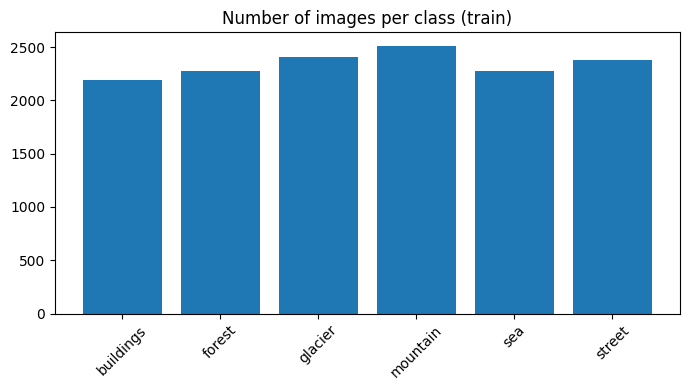

In [2]:

# Count images per class
counts = []
for c in classes:
    counts.append(len(list((TRAIN_DIR / c).glob("*.*"))))

import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.bar(classes, counts)
plt.xticks(rotation=45)
plt.title("Number of images per class (train)")
plt.tight_layout()


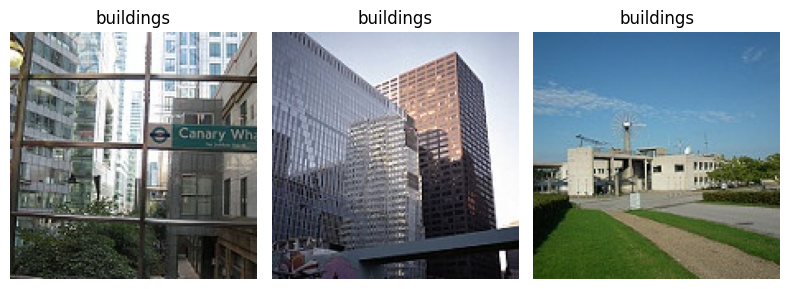

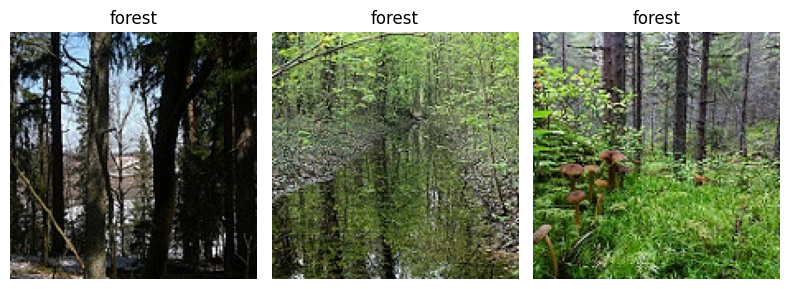

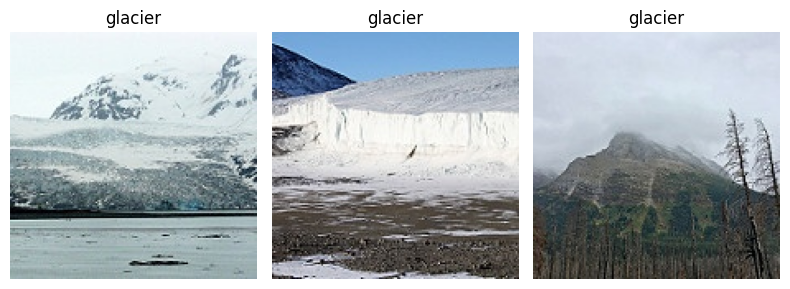

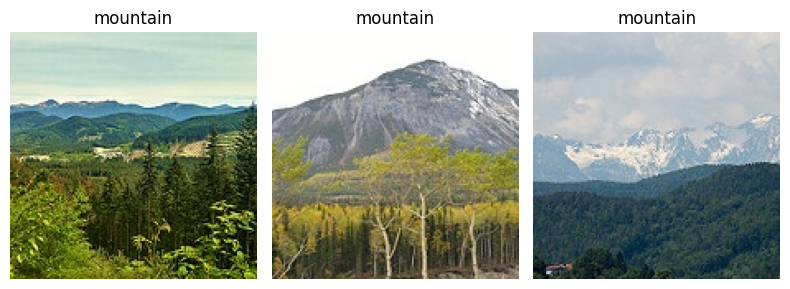

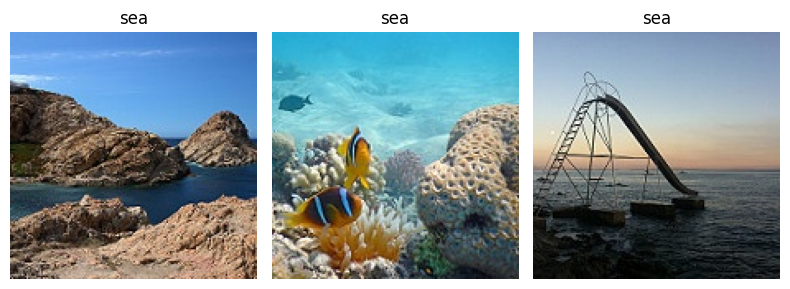

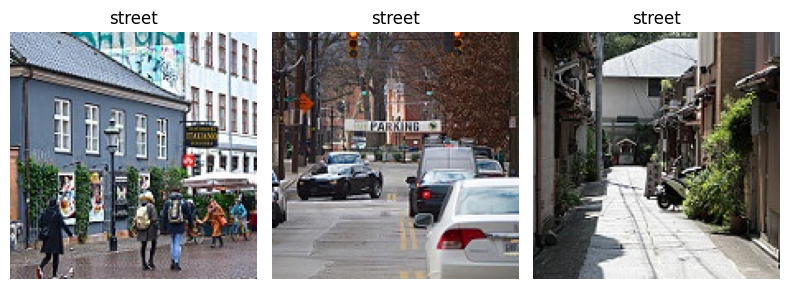

In [3]:

# Show 3 random images per class
import random
for c in classes:
    files = list((TRAIN_DIR / c).glob("*.jpg")) + list((TRAIN_DIR / c).glob("*.png")) + list((TRAIN_DIR / c).glob("*.jpeg"))
    if len(files) < 3: 
        print(f"Class {c} has <3 images.")
        continue
    picks = random.sample(files, 3)
    fig, axes = plt.subplots(1, 3, figsize=(8,3))
    for ax, p in zip(axes, picks):
        ax.imshow(Image.open(p).convert("RGB"))
        ax.set_title(c)
        ax.axis("off")
    plt.tight_layout()


In [4]:

# Train/Val balance check
train_total = sum(counts)
test_total  = sum(len(list((TEST_DIR / c).glob('*.*'))) for c in classes)
print("Train images:", train_total)
print("Test images :", test_total)


Train images: 14034
Test images : 3000
